## Creating Additional Graphs for Across-Country Results

In [1]:
import pandas as pd
import os, re
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Go through all the relevant csv in summary/ and add the means of each feature to a DataFrame

all_data = pd.DataFrame()
dir = 'summary/'
for file in os.listdir(dir):
    if re.match(r'^summary.\w*.csv$', file):
        name = file.split('.')[1].capitalize()
        if len(name) <= 2:
            name = name.upper()
        path = dir + file
        data = pd.read_csv(path, index_col='Name').mean().to_frame(name = name)
        all_data = pd.concat([all_data, data], axis=1)
all_data = all_data.T
all_data

,Number of Edges,Number of Vertices,Clustering Coefficient,Average Degree,Average Excess Degree,Average Distance,Size of LCC,Number of CC
Austria,63.000000,63.142857,0.015251,1.951212,3.184502,4.177512,40.857143,7.000000
France,7841.461538,443.538462,0.561757,31.576930,73.906622,2.737581,442.923077,1.307692
UK,663.000000,675.000000,0.000000,1.964444,236.666667,1.991582,346.000000,12.000000
Denmark,242.615385,109.076923,0.264482,3.987769,7.683237,3.837400,100.307692,2.615385
US,101524.666667,548.000000,0.977124,370.523013,430.300148,1.173752,480.666667,1.666667
Switzerland,1699.600000,134.000000,0.555829,18.472555,30.242941,2.006861,134.000000,1.000000
Sweden,3759.000000,384.000000,0.394497,19.539134,25.445347,3.018293,374.625000,1.250000


plots/across-country/Number of EdgesNumber of Vertices.png


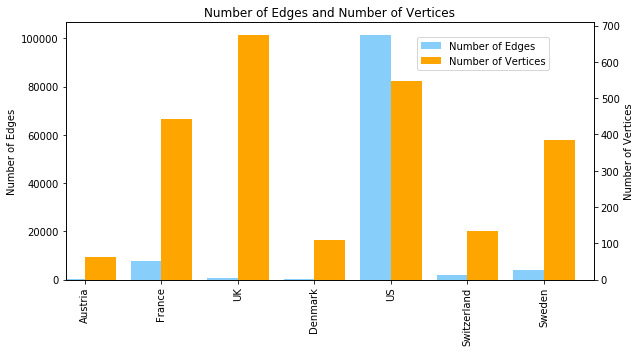

In [8]:
# Creating graph for number of edges and number of vertices

col1 = 'Number of Edges'
col2 = 'Number of Vertices'
data = all_data[[col1, col2]]

fig = plt.figure(figsize=(9,5)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

data[col1].plot(kind='bar', color='lightskyblue', ax=ax, width=width, position=1)
data[col2].plot(kind='bar', color='orange', ax=ax2, width=width, position=0)

ax.set_ylabel(col1)
ax2.set_ylabel(col2)
plt.title(col1 + ' and ' + col2)
fig.legend(loc=(0.65,0.8))
plt.tight_layout()

save_path = 'plots/across-country/' + col1 + col2 + '.pdf'
fig.savefig(save_path)
save_path = 'plots/across-country/' + col1 + col2 + '.png'
fig.savefig(save_path)

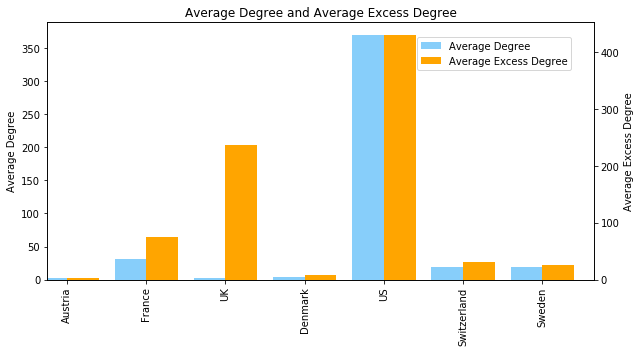

In [11]:
# Creating graph for number of edges and number of vertices

col1 = 'Average Degree'
col2 = 'Average Excess Degree'
data = all_data[[col1, col2]]

fig = plt.figure(figsize=(9,5)) # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

data[col1].plot(kind='bar', color='lightskyblue', ax=ax, width=width, position=1)
data[col2].plot(kind='bar', color='orange', ax=ax2, width=width, position=0)

ax.set_ylabel(col1)
ax2.set_ylabel(col2)
plt.title(col1 + ' and ' + col2)
fig.legend(loc=(0.65,0.8))
plt.tight_layout()

save_path = 'plots/across-country/' + col1 + col2 + '.pdf'
fig.savefig(save_path)
save_path = 'plots/across-country/' + col1 + col2 + '.png'
fig.savefig(save_path)